In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

In [21]:

df = pd.read_csv(r"E:\tri tue nhan tao trong maketing\bai tap cuoi ki\dataset_cleaned.csv")


In [22]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love          71       201933         0   
4                     Hold On          82       198853         0   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  int64  
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [40]:
print("S·ªë d√≤ng:", df.shape[0])
print("S·ªë c·ªôt:", df.shape[1])


S·ªë d√≤ng: 113999
S·ªë c·ªôt: 21


In [41]:
print("T√™n c√°c c·ªôt:", df.columns.tolist())

T√™n c√°c c·ªôt: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [24]:
df.describe(include='all')

Unnamed: 0                track_id      artists  \
count   113999.000000                  113999       113999   
unique            NaN                   89740        31437   
top               NaN  6S3JlDAGk3uu3NtZbPnuhS  The Beatles   
freq              NaN                       9          279   
mean     56999.421925                     NaN          NaN   
std      32909.243463                     NaN          NaN   
min          0.000000                     NaN          NaN   
25%      28499.500000                     NaN          NaN   
50%      56999.000000                     NaN          NaN   
75%      85499.500000                     NaN          NaN   
max     113999.000000                     NaN          NaN   

                        album_name       track_name     popularity  \
count                       113999           113999  113999.000000   
unique                       46589            73608            NaN   
top     Alternative Christmas 2022  Run Rudolph Run            NaN   
freq                           195              151            NaN   
mean                           NaN              NaN      33.238827   
std                            NaN              NaN      22.304959   
min                            NaN              NaN       0.000000   
25%                            NaN              NaN      17.000000   
50%                            NaN              NaN      35.000000   
75%                            NaN              NaN      50.000000   
max                            NaN              NaN     100.000000   

         duration_ms       explicit   danceability         energy  ...  \
count   1.139990e+05  113999.000000  113999.000000  113999.000000  ...   
unique           NaN            NaN            NaN            NaN  ...   
top              NaN            NaN            NaN            NaN  ...   
freq             NaN            NaN            NaN            NaN  ...   
mean    2.280312e+05       0.085501       0.566801       0.641383  ...   
std     1.072961e+05       0.279627       0.173543       0.251530  ...   
min     8.586000e+03       0.000000       0.000000       0.000000  ...   
25%     1.740660e+05       0.000000       0.456000       0.472000  ...   
50%     2.129060e+05       0.000000       0.580000       0.685000  ...   
75%     2.615060e+05       0.000000       0.695000       0.854000  ...   
max     5.237295e+06       1.000000       0.985000       1.000000  ...   

             loudness           mode    speechiness   acousticness  \
count   113999.000000  113999.000000  113999.000000  113999.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -8.258950       0.637558       0.084652       0.314907   
std          5.029357       0.480708       0.105733       0.332522   
min        -49.531000       0.000000       0.000000       0.000000   
25%        -10.013000       0.000000       0.035900       0.016900   
50%         -7.004000       1.000000       0.048900       0.169000   
75%         -5.003000       1.000000       0.084500       0.597500   
max          4.532000       1.000000       0.965000       0.996000   

        instrumentalness       liveness        valence          tempo  \
count      113999.000000  113999.000000  113999.000000  113999.000000   
unique               NaN            NaN            NaN            NaN   
top                  NaN            NaN            NaN            NaN   
freq                 NaN            NaN            NaN            NaN   
mean            0.156051       0.213554       0.474066     122.147695   
std             0.309556       0.190378       0.259261      29.978290   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.098000       0.260000      99.218500   
50%             0.000042       0.13200

In [25]:
# ƒê·∫øm s·ªë l∆∞·ª£ng ngh·ªá sƒ© duy nh·∫•t trong t·∫≠p d·ªØ li·ªáu v√† s·ªë l∆∞·ª£ng b√†i h√°t c·ªßa t·ª´ng ngh·ªá sƒ©
print(df['artists'].unique().shape)
print(df['artists'].value_counts())

(31437,)
artists
The Beatles                           279
George Jones                          271
Stevie Wonder                         236
Linkin Park                           224
Ella Fitzgerald                       222
                                     ... 
Hillsong Worship;TAYA;David Ware        1
for KING & COUNTRY;Andy Mineo           1
Bethel Music;Francesca Battistelli      1
Descansa                                1
Jesus Culture                           1
Name: count, Length: 31437, dtype: int64


In [26]:
# S·∫Øp x·∫øp c√°c bi·∫øn theo th·ª© t·ª± gi·∫£m d·∫ßn theo gi√° tr·ªã c√≤n thi·∫øu c·ªßa ch√∫ng
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [27]:
# Hi·ªÉn th·ªã c√°c h√†ng c√≥ gi√° tr·ªã thi·∫øu trong artists
print(df[df['artists'].isnull()])


Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


In [28]:
# X·ª≠ l√≠ d·ªØ li·ªáu thi·∫øu b·∫±ng c√°ch lo·∫°i b·ªè c√°c h√†ng c√≥ gi√° tr·ªã thi·∫øu
df_cleaned = df.dropna(subset=['artists'])
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  int64  
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [29]:
# ki·ªÉm tra d·ªØ li·ªáu tr√πng l·∫∑p
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


In [30]:
# Ki·ªÉm tra d·ª± li·ªáu ngo·∫°i lai
df_cleaned.describe(include='all')

Unnamed: 0                track_id      artists  \
count   113999.000000                  113999       113999   
unique            NaN                   89740        31437   
top               NaN  6S3JlDAGk3uu3NtZbPnuhS  The Beatles   
freq              NaN                       9          279   
mean     56999.421925                     NaN          NaN   
std      32909.243463                     NaN          NaN   
min          0.000000                     NaN          NaN   
25%      28499.500000                     NaN          NaN   
50%      56999.000000                     NaN          NaN   
75%      85499.500000                     NaN          NaN   
max     113999.000000                     NaN          NaN   

                        album_name       track_name     popularity  \
count                       113999           113999  113999.000000   
unique                       46589            73608            NaN   
top     Alternative Christmas 2022  Run Rudolph Run            NaN   
freq                           195              151            NaN   
mean                           NaN              NaN      33.238827   
std                            NaN              NaN      22.304959   
min                            NaN              NaN       0.000000   
25%                            NaN              NaN      17.000000   
50%                            NaN              NaN      35.000000   
75%                            NaN              NaN      50.000000   
max                            NaN              NaN     100.000000   

         duration_ms       explicit   danceability         energy  ...  \
count   1.139990e+05  113999.000000  113999.000000  113999.000000  ...   
unique           NaN            NaN            NaN            NaN  ...   
top              NaN            NaN            NaN            NaN  ...   
freq             NaN            NaN            NaN            NaN  ...   
mean    2.280312e+05       0.085501       0.566801       0.641383  ...   
std     1.072961e+05       0.279627       0.173543       0.251530  ...   
min     8.586000e+03       0.000000       0.000000       0.000000  ...   
25%     1.740660e+05       0.000000       0.456000       0.472000  ...   
50%     2.129060e+05       0.000000       0.580000       0.685000  ...   
75%     2.615060e+05       0.000000       0.695000       0.854000  ...   
max     5.237295e+06       1.000000       0.985000       1.000000  ...   

             loudness           mode    speechiness   acousticness  \
count   113999.000000  113999.000000  113999.000000  113999.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -8.258950       0.637558       0.084652       0.314907   
std          5.029357       0.480708       0.105733       0.332522   
min        -49.531000       0.000000       0.000000       0.000000   
25%        -10.013000       0.000000       0.035900       0.016900   
50%         -7.004000       1.000000       0.048900       0.169000   
75%         -5.003000       1.000000       0.084500       0.597500   
max          4.532000       1.000000       0.965000       0.996000   

        instrumentalness       liveness        valence          tempo  \
count      113999.000000  113999.000000  113999.000000  113999.000000   
unique               NaN            NaN            NaN            NaN   
top                  NaN            NaN            NaN            NaN   
freq                 NaN            NaN            NaN            NaN   
mean            0.156051       0.213554       0.474066     122.147695   
std             0.309556       0.190378       0.259261      29.978290   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.098000       0.260000      99.218500   
50%             0.000042       0.13200

In [31]:
# Hi·ªÉn th·ªã m√¥ t·∫£ thu·ªôc t√≠nh Explicit
print(df_cleaned['explicit'].value_counts())

explicit
0    104252
1      9747
Name: count, dtype: int64


In [32]:
# Chu·∫©n h√≥a d·ªØ li·ªáu cho c·ªôt 'explicit' (0 v√† 1)
df_cleaned['explicit'] = df_cleaned['explicit'].apply(lambda x: 1 if x == True else 0)
print(df_cleaned['explicit'].value_counts())

explicit
0    104252
1      9747
Name: count, dtype: int64


In [37]:
# L∆∞u d·ªØ li·ªáu ƒë√£ l√†m s·∫°ch v√†o file m·ªõi
df_cleaned.to_csv(r"E:\tri tue nhan tao trong maketing\bai tap cuoi ki\newdataset.csv", index=False)

### Ng√¥ B√° Qu√¢n - ph√¢n t√≠ch, ph√¢n b·ªë v√† th·ªëng k√™ m√¥ t·∫£

In [38]:
# Ch·ªçn c√°c c·ªôt ƒë·∫∑c tr∆∞ng √¢m nh·∫°c ch√≠nh
features = ['tempo', 'energy', 'valence', 'popularity']

# Th·ªëng k√™ m√¥ t·∫£
stats = df[features].describe().T
print("Th·ªëng k√™ m√¥ t·∫£ c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c:")
display(stats)

# Th√™m t√≠nh trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n ri√™ng l·∫ª
mean_values = df[features].mean()
std_values = df[features].std()
print("\nGi√° tr·ªã trung b√¨nh:")
print(mean_values)
print("\nƒê·ªô l·ªách chu·∫©n:")
print(std_values)


Th·ªëng k√™ m√¥ t·∫£ c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c:


count        mean        std  min      25%      50%      75%  \
tempo       113999.0  122.147695  29.978290  0.0  99.2185  122.017  140.071   
energy      113999.0    0.641383   0.251530  0.0   0.4720    0.685    0.854   
valence     113999.0    0.474066   0.259261  0.0   0.2600    0.464    0.683   
popularity  113999.0   33.238827  22.304959  0.0  17.0000   35.000   50.000   

                max  
tempo       243.372  
energy        1.000  
valence       0.995  
popularity  100.000


Gi√° tr·ªã trung b√¨nh:
tempo         122.147695
energy          0.641383
valence         0.474066
popularity     33.238827
dtype: float64

ƒê·ªô l·ªách chu·∫©n:
tempo         29.978290
energy         0.251530
valence        0.259261
popularity    22.304959
dtype: float64


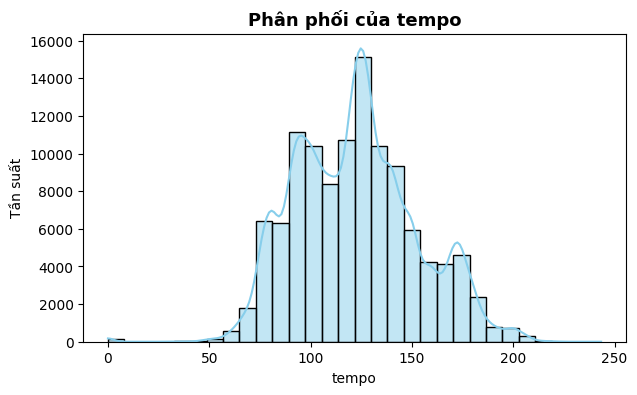

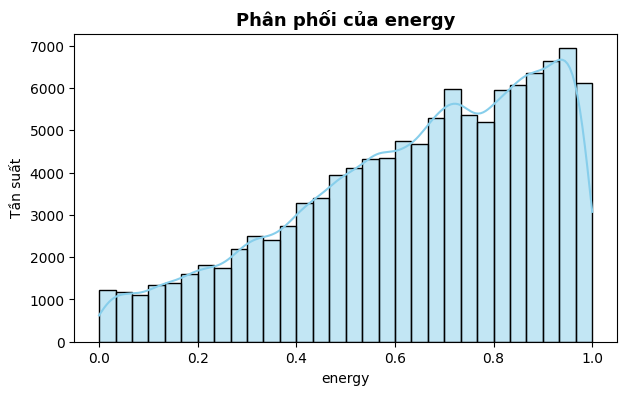

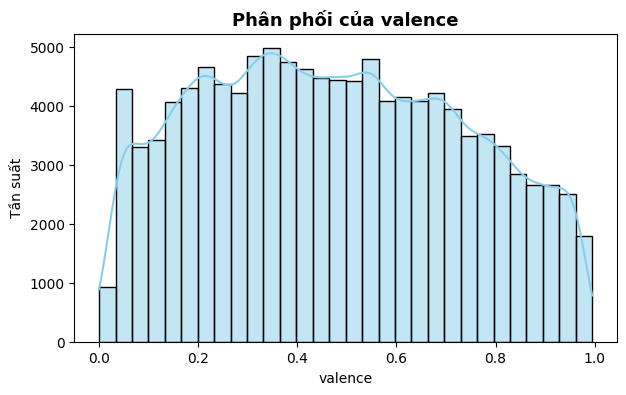

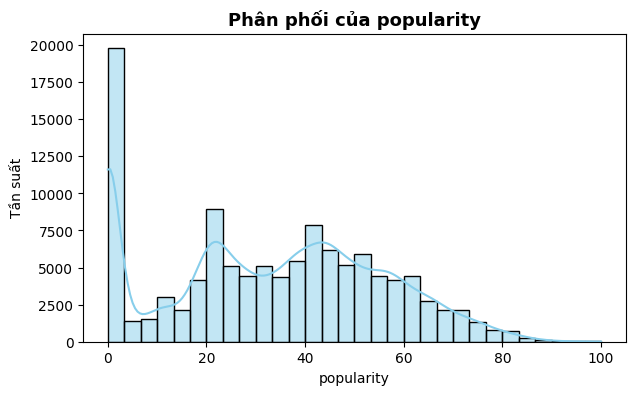

In [39]:
# V·∫Ω ph√¢n ph·ªëi cho t·ª´ng ƒë·∫∑c tr∆∞ng
for col in features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Ph√¢n ph·ªëi c·ªßa {col}', fontsize=13, weight='bold')
    plt.xlabel(col)
    plt.ylabel('T·∫ßn su·∫•t')
    plt.show()


### Nh·∫≠n x√©t:
1. tempo: ph·∫ßn l·ªõn b√†i h√°t c√≥ tempo trung b√¨nh kho·∫£ng 110‚Äì130 BPM ‚Üí ph·ªï bi·∫øn ·ªü nh·∫°c Pop/Dance.
2. energy: ph√¢n ph·ªëi l·ªách ph·∫£i ‚Üí ƒëa s·ªë b√†i h√°t c√≥ nƒÉng l∆∞·ª£ng trung b√¨nh.
3. valence: ph√¢n ph·ªëi r·ªông ‚Üí nhi·ªÅu b√†i h√°t c√≥ c·∫£m x√∫c trung l·∫≠p ho·∫∑c bu·ªìn nh·∫π.
4. popularity: ph√¢n ph·ªëi l·ªách tr√°i ‚Üí ch·ªâ m·ªôt s·ªë √≠t b√†i h√°t th·ª±c s·ª± ph·ªï bi·∫øn.

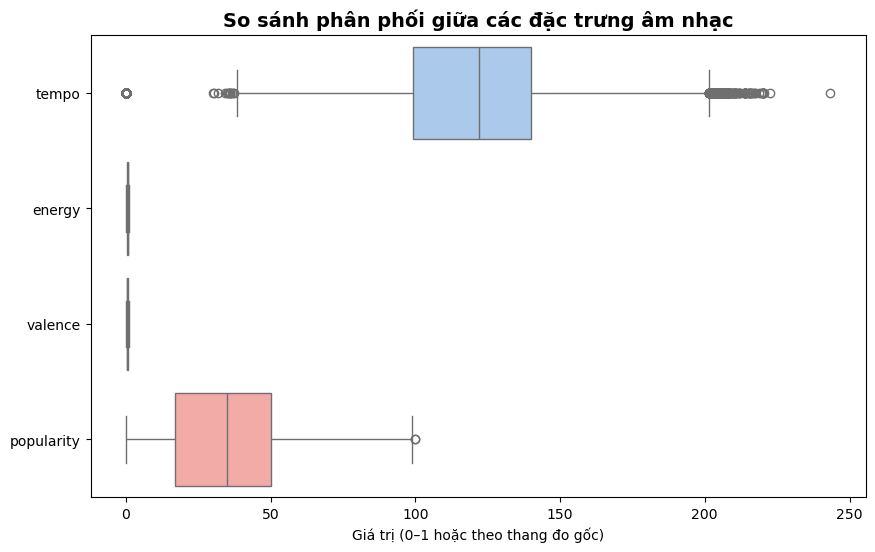

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[features], orient="h", palette="pastel")
plt.title("So s√°nh ph√¢n ph·ªëi gi·ªØa c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c", fontsize=14, weight='bold')
plt.xlabel("Gi√° tr·ªã (0‚Äì1 ho·∫∑c theo thang ƒëo g·ªëc)")
plt.show()


1. valence v√† energy c√≥ ph√¢n ph·ªëi kh√° r·ªông ‚Üí th·ªÉ hi·ªán s·ª± ƒëa d·∫°ng trong phong c√°ch √¢m nh·∫°c.
2. popularity c√≥ nhi·ªÅu outlier ‚Üí m·ªôt s·ªë b√†i h√°t c·ª±c k·ª≥ ph·ªï bi·∫øn v∆∞·ª£t tr·ªôi.

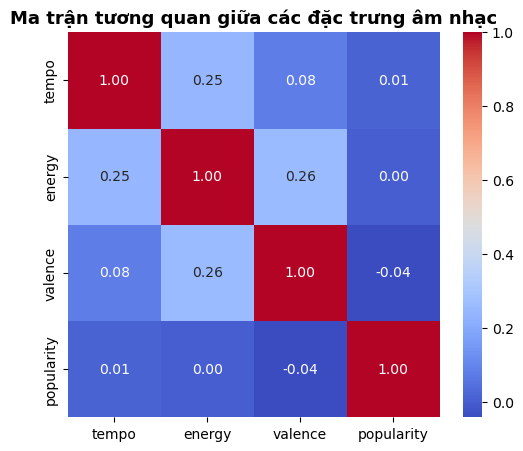

In [23]:
plt.figure(figsize=(6,5))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c", fontsize=13, weight='bold')
plt.show()


1. energy v√† valence th∆∞·ªùng c√≥ t∆∞∆°ng quan d∆∞∆°ng nh·∫π ‚Üí b√†i h√°t nƒÉng l∆∞·ª£ng cao th∆∞·ªùng mang c·∫£m x√∫c t√≠ch c·ª±c h∆°n.
2. popularity c√≥ th·ªÉ kh√¥ng t∆∞∆°ng quan m·∫°nh v·ªõi b·∫•t k·ª≥ feature n√†o ‚Üí ch·ª©ng t·ªè y·∫øu t·ªë ‚Äúph·ªï bi·∫øn‚Äù c√≤n ph·ª• thu·ªôc v√†o y·∫øu t·ªë ngo√†i √¢m nh·∫°c (marketing, ngh·ªá sƒ©,‚Ä¶).

### M√£ h√≥a d·ªØ li·ªáu d·∫°ng chu·ªói (Label Encoding)

In [44]:
label_artist = LabelEncoder()
label_genre = LabelEncoder()

In [45]:
df['artist_encoded'] = label_artist.fit_transform(df['artists'].fillna('Unknown').astype(str))
df['genre_encoded']  = label_genre.fit_transform(df['track_genre'].fillna('Unknown').astype(str))


In [46]:
df[['artists', 'artist_encoded', 'track_genre', 'genre_encoded']].head()


artists  artist_encoded track_genre  genre_encoded
0             Gen Hoshino           10357    acoustic              0
1            Ben Woodward            3287    acoustic              0
2  Ingrid Michaelson;ZAYN           12397    acoustic              0
3            Kina Grannis           14839    acoustic              0
4        Chord Overstreet            5255    acoustic              0

### Nh·∫≠n x√©t
C·ªôt artist_name v√† genre ƒë√£ ƒë∆∞·ª£c m√£ h√≥a th√†nh d·∫°ng s·ªë (artist_encoded, genre_encoded) gi√∫p m√¥ h√¨nh d·ªÖ d√†ng x·ª≠ l√Ω h∆°n.

V√≠ d·ª•: ‚ÄúEd Sheeran‚Äù ‚Üí 105, ‚ÄúPop‚Äù ‚Üí 2.

ƒê√¢y l√† b∆∞·ªõc quan tr·ªçng trong pipeline v√¨ m√¥ h√¨nh m√°y h·ªçc kh√¥ng th·ªÉ x·ª≠ l√Ω tr·ª±c ti·∫øp d·ªØ li·ªáu d·∫°ng text.

### Chu·∫©n h√≥a d·ªØ li·ªáu s·ªë (MinMaxScaler)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
num_cols = ['tempo', 'energy', 'valence', 'danceability', 
            'loudness', 'acousticness', 'instrumentalness', 
            'speechiness', 'liveness', 'popularity', 'duration_ms']

df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

tempo         energy        valence   danceability  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        0.501897       0.641383       0.476448       0.575432   
std         0.123179       0.251530       0.260564       0.176186   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.407682       0.472000       0.261307       0.462944   
50%         0.501360       0.685000       0.466332       0.588832   
75%         0.575543       0.854000       0.686432       0.705584   
max         1.000000       1.000000       1.000000       1.000000   

            loudness   acousticness  instrumentalness    speechiness  \
count  113999.000000  113999.000000     113999.000000  113999.000000   
mean        0.763407       0.316171          0.156051       0.087723   
std         0.093028       0.333858          0.309556       0.109568   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.730962       0.016968          0.000000       0.037202   
50%         0.786619       0.169679          0.000042       0.050674   
75%         0.823632       0.599900          0.049000       0.087565   
max         1.000000       1.000000          1.000000       1.000000   

            liveness     popularity    duration_ms  
count  113999.000000  113999.000000  113999.000000  
mean        0.213554       0.332388       0.041969  
std         0.190378       0.223050       0.020521  
min         0.000000       0.000000       0.000000  
25%         0.098000       0.170000       0.031648  
50%         0.132000       0.350000       0.039077  
75%         0.273000       0.500000       0.048371  
max         1.000000       1.000000       1.000000

### Nh·∫≠n x√©t:

T·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c s·ªë ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v·ªÅ kho·∫£ng [0, 1], ƒë·∫£m b·∫£o c√°c ƒë·∫∑c tr∆∞ng c√≥ tr·ªçng s·ªë t∆∞∆°ng ƒë∆∞∆°ng khi t√≠nh to√°n ƒë·ªô t∆∞∆°ng ƒë·ªìng.

ƒêi·ªÅu n√†y ƒë·∫∑c bi·ªát quan tr·ªçng trong Content-based filtering v√¨ m√¥ h√¨nh d·ª±a v√†o kho·∫£ng c√°ch gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu.

Kh√¥ng chu·∫©n h√≥a c√≥ th·ªÉ khi·∫øn c√°c c·ªôt nh∆∞ duration_ms (c√≥ gi√° tr·ªã l·ªõn) chi ph·ªëi k·∫øt qu·∫£ t√≠nh to√°n.

### T√≠nh ma tr·∫≠n t∆∞∆°ng quan & V·∫Ω Heatmap

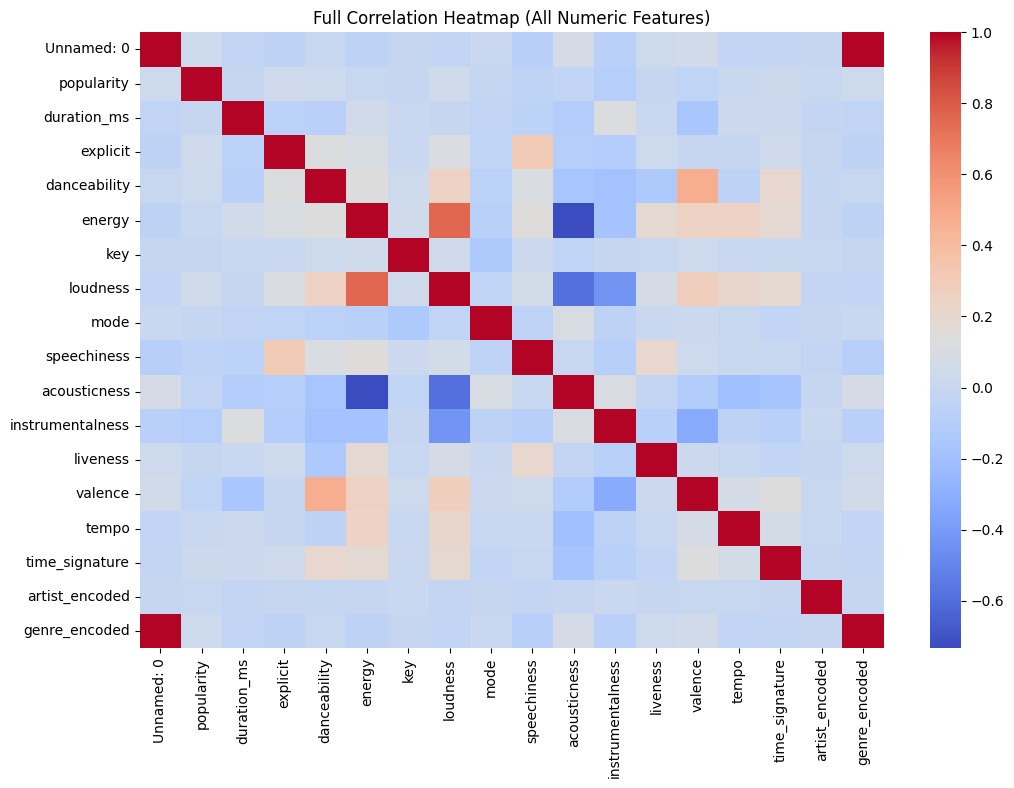

In [49]:
#  Ma tr·∫≠n t∆∞∆°ng quan to√†n b·ªô d·ªØ li·ªáu s·ªë
corr_full = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_full, cmap="coolwarm", annot=False)
plt.title("Full Correlation Heatmap (All Numeric Features)")
plt.show()

####  Ma tr·∫≠n t∆∞∆°ng quan to√†n b·ªô ƒë·∫∑c tr∆∞ng s·ªë (Full Correlation Heatmap)

- Ma tr·∫≠n t∆∞∆°ng quan t·ªïng th·ªÉ cho th·∫•y ƒëa s·ªë c√°c ƒë·∫∑c tr∆∞ng c√≥ **t∆∞∆°ng quan y·∫øu ƒë·∫øn trung b√¨nh**, th·ªÉ hi·ªán b·∫±ng m√†u nh·∫°t g·∫ßn trung t√≠nh. ƒêi·ªÅu n√†y cho th·∫•y nhi·ªÅu ƒë·∫∑c tr∆∞ng t∆∞∆°ng ƒë·ªëi ƒë·ªôc l·∫≠p v√† c√≥ th·ªÉ mang th√¥ng tin ri√™ng bi·ªát khi ƒë∆∞a v√†o m√¥ h√¨nh.
- M·ªôt s·ªë c·∫∑p ƒë·∫∑c tr∆∞ng n·ªïi b·∫≠t c√≥ t∆∞∆°ng quan m·∫°nh:
  - **`energy` ‚Üî `loudness` ‚âà 0.76 (thu·∫≠n m·∫°nh):** b√†i h√°t nƒÉng l∆∞·ª£ng cao th∆∞·ªùng c√≥ √¢m l∆∞·ª£ng l·ªõn h∆°n.
  - **`energy` ‚Üî `acousticness` ‚âà -0.73 (ngh·ªãch m·∫°nh):** nh·∫°c acoustic th∆∞·ªùng c√≥ nƒÉng l∆∞·ª£ng th·∫•p, trong khi nh·∫°c ƒëi·ªán t·ª≠ ho·∫∑c rock c√≥ nƒÉng l∆∞·ª£ng cao h∆°n.
  - **`loudness` ‚Üî `acousticness` ‚âà -0.59 (ngh·ªãch trung b√¨nh m·∫°nh):** nh·∫°c acoustic th∆∞·ªùng c√≥ √¢m l∆∞·ª£ng nh·ªè h∆°n.
- C√°c c·ªôt nh∆∞ `artist_encoded` hay `genre_encoded` ch·ªâ l√† nh√£n m√£ h√≥a n√™n h·ªá s·ªë t∆∞∆°ng quan c·ªßa ch√∫ng kh√¥ng c√≥ nhi·ªÅu √Ω nghƒ©a √¢m h·ªçc.
- Bi·∫øn `popularity` c√≥ t∆∞∆°ng quan th·∫•p v·ªõi c√°c ƒë·∫∑c tr∆∞ng √¢m h·ªçc, g·ª£i √Ω r·∫±ng ƒë·ªô ph·ªï bi·∫øn c·ªßa b√†i h√°t kh√¥ng ch·ªâ ph·ª• thu·ªôc v√†o ƒë·∫∑c ƒëi·ªÉm √¢m nh·∫°c m√† c√≤n b·ªã chi ph·ªëi b·ªüi y·∫øu t·ªë b√™n ngo√†i nh∆∞ th·ªùi gian ph√°t h√†nh, ngh·ªá sƒ© hay xu h∆∞·ªõng th·ªã tr∆∞·ªùng.


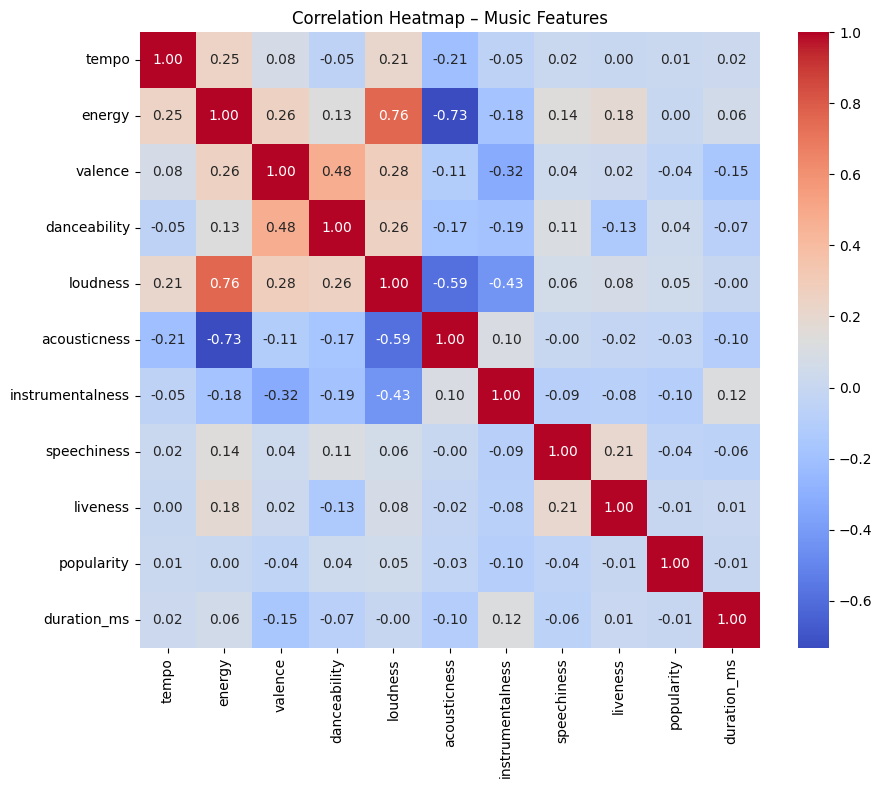

In [50]:
# Ma tr·∫≠n t∆∞∆°ng quan nh√≥m ƒë·∫∑c tr∆∞ng √¢m nh·∫°c ch√≠nh
music_features = ['tempo', 'energy', 'valence', 'danceability', 
                  'loudness', 'acousticness', 'instrumentalness', 
                  'speechiness', 'liveness', 'popularity', 'duration_ms']

corr_music = df[music_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_music, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap ‚Äì Music Features")
plt.show()

####  Ma tr·∫≠n t∆∞∆°ng quan nh√≥m ƒë·∫∑c tr∆∞ng √¢m nh·∫°c ch√≠nh

Khi ch·ªâ t·∫≠p trung v√†o c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c c·ªët l√µi (`tempo`, `energy`, `valence`, `danceability`, `loudness`, `acousticness`, `instrumentalness`, `speechiness`, `liveness`, `popularity`, `duration_ms`), c√°c m·ªëi quan h·ªá th·ªÉ hi·ªán r√µ r√†ng v√† c√≥ √Ω nghƒ©a h∆°n:

- **`energy` ‚Üî `loudness` ‚âà 0.76 (thu·∫≠n r·∫•t m·∫°nh):** x√°c nh·∫≠n r·∫±ng c√°c b√†i h√°t s√¥i ƒë·ªông c√≥ √¢m l∆∞·ª£ng cao h∆°n ‚Äì ƒëi·ªÅu quan tr·ªçng khi m√¥ h√¨nh h√≥a phong c√°ch nh·∫°c.  
- **`energy` ‚Üî `acousticness` ‚âà -0.73 (ngh·ªãch m·∫°nh):** ƒë·∫∑c tr∆∞ng quan tr·ªçng ƒë·ªÉ ph√¢n t√°ch nh·∫°c acoustic v·ªõi nh·∫°c ƒëi·ªán t·ª≠/rock.  
- **`valence` ‚Üî `danceability` ‚âà 0.48 (thu·∫≠n trung b√¨nh):** b√†i h√°t c√≥ c·∫£m x√∫c t√≠ch c·ª±c th∆∞·ªùng d·ªÖ nh·∫£y ‚Äì g·ª£i √Ω ti·ªÅm nƒÉng ƒë·ªÉ x√¢y d·ª±ng h·ªá th·ªëng g·ª£i √Ω d·ª±a tr√™n t√¢m tr·∫°ng ng∆∞·ªùi d√πng.  
- **`loudness` ‚Üî `instrumentalness` ‚âà -0.43 (ngh·ªãch trung b√¨nh):** c√°c b·∫£n nh·∫°c kh√¥ng l·ªùi c√≥ xu h∆∞·ªõng √¢m l∆∞·ª£ng th·∫•p h∆°n.  
- **`valence` ‚Üî `instrumentalness` ‚âà -0.32 (ngh·ªãch):** c√°c b√†i instrumental th∆∞·ªùng c√≥ c·∫£m x√∫c trung t√≠nh ho·∫∑c tr·∫ßm h∆°n.

Ngo√†i ra, bi·∫øn `popularity` ti·∫øp t·ª•c th·ªÉ hi·ªán t∆∞∆°ng quan y·∫øu v·ªõi c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c, cho th·∫•y c·∫ßn th√™m y·∫øu t·ªë b·ªï tr·ª£ n·∫øu mu·ªën d·ª± ƒëo√°n ƒë·ªô ph·ªï bi·∫øn c·ªßa b√†i h√°t.



####  K·∫øt lu·∫≠n v√† √Ω nghƒ©a ƒë·ªëi v·ªõi m√¥ h√¨nh g·ª£i √Ω

- C√°c ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan qu√° cao (ƒë·∫∑c bi·ªát l√† `energy` v√† `loudness`) c√≥ th·ªÉ g√¢y **ƒëa c·ªông tuy·∫øn**, do ƒë√≥ ch·ªâ n√™n gi·ªØ **m·ªôt trong hai** khi x√¢y d·ª±ng vector ƒë·∫∑c tr∆∞ng ƒë·ªÉ m√¥ h√¨nh ho·∫°t ƒë·ªông ·ªïn ƒë·ªãnh h∆°n.
- C√°c ƒë·∫∑c tr∆∞ng nh∆∞ `valence`, `danceability`, `acousticness` v√† `energy` mang th√¥ng tin quan tr·ªçng gi√∫p m√¥ h√¨nh hi·ªÉu r√µ h∆°n v·ªÅ c·∫£m x√∫c, phong c√°ch v√† c·∫•u tr√∫c √¢m nh·∫°c c·ªßa b√†i h√°t.
- Ph√¢n t√≠ch t∆∞∆°ng quan l√† b∆∞·ªõc quan tr·ªçng ƒë·ªÉ **lo·∫°i b·ªè ƒë·∫∑c tr∆∞ng tr√πng l·∫∑p**, **ch·ªçn bi·∫øn h·ªØu √≠ch** v√† **ƒë·ªãnh h∆∞·ªõng x√¢y d·ª±ng h·ªá th·ªëng g·ª£i √Ω nh·∫°c theo t√¢m tr·∫°ng v√† s·ªü th√≠ch ng∆∞·ªùi d√πng** ·ªü c√°c b∆∞·ªõc ti·∫øp theo.

 **T√≥m l·∫°i**, vi·ªác ph√¢n t√≠ch ma tr·∫≠n t∆∞∆°ng quan kh√¥ng ch·ªâ gi√∫p ch√∫ng ta hi·ªÉu r√µ m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c m√† c√≤n ƒë√≥ng vai tr√≤ n·ªÅn t·∫£ng ƒë·ªÉ thi·∫øt k·∫ø vector ƒë·∫∑c tr∆∞ng v√† t·ªëi ∆∞u h√≥a m√¥ h√¨nh g·ª£i √Ω trong c√°c tu·∫ßn sau.

### Tr√≠ch xu·∫•t Top 7 m·ªëi t∆∞∆°ng quan m·∫°nh nh·∫•t

In [51]:
#  Tr√≠ch xu·∫•t top 7 m·ªëi t∆∞∆°ng quan m·∫°nh nh·∫•t
corr_pairs = (
    corr_music.where(np.triu(np.ones(corr_music.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature A', 'level_1': 'Feature B', 0: 'Correlation'})
)

top7 = corr_pairs.reindex(corr_pairs.Correlation.abs().sort_values(ascending=False).index).head(7)
top7


Feature A         Feature B  Correlation
12    energy          loudness     0.761690
13    energy      acousticness    -0.733908
34  loudness      acousticness    -0.589804
19   valence      danceability     0.477347
35  loudness  instrumentalness    -0.433478
22   valence  instrumentalness    -0.324310
20   valence          loudness     0.279851

###  Top 7 m·ªëi t∆∞∆°ng quan m·∫°nh nh·∫•t gi·ªØa c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c

B·∫£ng d∆∞·ªõi ƒë√¢y th·ªÉ hi·ªán 7 c·∫∑p ƒë·∫∑c tr∆∞ng c√≥ m·ªëi t∆∞∆°ng quan tuy·∫øn t√≠nh m·∫°nh nh·∫•t trong t·∫≠p d·ªØ li·ªáu Spotify. C√°c h·ªá s·ªë t∆∞∆°ng quan d∆∞∆°ng g·∫ßn 1 th·ªÉ hi·ªán m·ªëi quan h·ªá thu·∫≠n m·∫°nh, trong khi c√°c gi√° tr·ªã √¢m g·∫ßn -1 th·ªÉ hi·ªán m·ªëi quan h·ªá ngh·ªãch m·∫°nh.

| Feature A           | Feature B           | Correlation | Nh·∫≠n x√©t √Ω nghƒ©a |
|---------------------|---------------------|--------------|------------------|
| `energy`           | `loudness`          | **0.7617**   | M·ªëi t∆∞∆°ng quan thu·∫≠n r·∫•t m·∫°nh: c√°c b√†i h√°t c√≥ nƒÉng l∆∞·ª£ng cao th∆∞·ªùng c√≥ √¢m l∆∞·ª£ng l·ªõn. ƒêi·ªÅu n√†y ph·∫£n √°nh ƒë·∫∑c t√≠nh t·ª± nhi√™n c·ªßa nh·∫°c s√¥i ƒë·ªông nh∆∞ EDM, pop hay rock. |
| `energy`           | `acousticness`      | **-0.7339**  | M·ªëi t∆∞∆°ng quan ngh·ªãch r·∫•t m·∫°nh: nh·∫°c acoustic th∆∞·ªùng c√≥ nƒÉng l∆∞·ª£ng th·∫•p, ng∆∞·ª£c l·∫°i nh·∫°c ƒëi·ªán t·ª≠ ho·∫∑c rock c√≥ nƒÉng l∆∞·ª£ng cao h∆°n. |
| `loudness`         | `acousticness`      | **-0.5898**  | M·ªëi t∆∞∆°ng quan ngh·ªãch trung b√¨nh m·∫°nh: nh·∫°c acoustic th∆∞·ªùng ƒë∆∞·ª£c ghi √¢m v·ªõi √¢m l∆∞·ª£ng nh·ªè h∆°n. |
| `valence`          | `danceability`      | **0.4773**   | M·ªëi t∆∞∆°ng quan thu·∫≠n trung b√¨nh: b√†i h√°t c√≥ c·∫£m x√∫c t√≠ch c·ª±c th∆∞·ªùng d·ªÖ nh·∫£y h∆°n. ƒê√¢y l√† y·∫øu t·ªë quan tr·ªçng ƒë·ªÉ m√¥ h√¨nh g·ª£i √Ω nh·∫°c theo t√¢m tr·∫°ng ng∆∞·ªùi d√πng. |
| `loudness`         | `instrumentalness`  | **-0.4335**  | M·ªëi t∆∞∆°ng quan ngh·ªãch trung b√¨nh: nh·∫°c kh√¥ng l·ªùi c√≥ xu h∆∞·ªõng c√≥ √¢m l∆∞·ª£ng th·∫•p h∆°n c√°c b√†i h√°t c√≥ l·ªùi. |
| `valence`          | `instrumentalness`  | **-0.3243**  | M·ªëi t∆∞∆°ng quan ngh·ªãch: nh·∫°c instrumental c√≥ xu h∆∞·ªõng mang c·∫£m x√∫c trung t√≠nh ho·∫∑c tr·∫ßm h∆°n. |
| `valence`          | `loudness`          | **0.2799**   | M·ªëi t∆∞∆°ng quan thu·∫≠n y·∫øu: b√†i h√°t c√≥ c·∫£m x√∫c t√≠ch c·ª±c th∆∞·ªùng ƒë∆∞·ª£c s·∫£n xu·∫•t v·ªõi √¢m l∆∞·ª£ng l·ªõn h∆°n ƒë√¥i ch√∫t. |

---

#### üìä Nh·∫≠n x√©t t·ªïng qu√°t:

- Nh√≥m ƒë·∫∑c tr∆∞ng **`energy` ‚Äì `loudness` ‚Äì `acousticness`** th·ªÉ hi·ªán m·ªëi li√™n h·ªá r·∫•t m·∫°nh, ph·∫£n √°nh r√µ r·ªát s·ª± kh√°c bi·ªát gi·ªØa c√°c th·ªÉ lo·∫°i nh·∫°c s√¥i ƒë·ªông v√† nh·∫°c m·ªôc.  
- C·∫∑p **`valence` ‚Äì `danceability`** l√† ƒë·∫∑c tr∆∞ng quan tr·ªçng ƒë·ªÉ g·ª£i √Ω nh·∫°c d·ª±a tr√™n t√¢m tr·∫°ng v√† tr·∫£i nghi·ªám ng∆∞·ªùi d√πng.  
- C√°c m·ªëi t∆∞∆°ng quan √¢m cho th·∫•y c√°c ƒë·∫∑c ƒëi·ªÉm nh∆∞ ‚Äúm·ª©c ƒë·ªô acoustic‚Äù hay ‚Äúinstrumentalness‚Äù th∆∞·ªùng ƒë·ªëi l·∫≠p v·ªõi ‚ÄúnƒÉng l∆∞·ª£ng‚Äù v√† ‚Äú√¢m l∆∞·ª£ng‚Äù ‚Äì ƒëi·ªÅu n√†y c√≥ th·ªÉ khai th√°c ƒë·ªÉ m√¥ h√¨nh ph√¢n t√°ch c√°c d√≤ng nh·∫°c kh√°c nhau.  
- M·ªôt s·ªë ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan cao (**> 0.7**) nh∆∞ `energy` v√† `loudness` c√≥ th·ªÉ g√¢y ƒëa c·ªông tuy·∫øn, n√™n c√¢n nh·∫Øc ch·ªçn l·ªçc khi x√¢y d·ª±ng m√¥ h√¨nh.

---

üéØ **K·∫øt lu·∫≠n:**  
Ph√¢n t√≠ch top 7 m·ªëi t∆∞∆°ng quan m·∫°nh nh·∫•t gi√∫p x√°c ƒë·ªãnh r√µ c√°c m·ªëi quan h·ªá c·ªët l√µi gi·ªØa c√°c ƒë·∫∑c tr∆∞ng √¢m nh·∫°c. K·∫øt qu·∫£ n√†y kh√¥ng ch·ªâ h·ªó tr·ª£ vi·ªác l·ª±a ch·ªçn ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o m√† c√≤n cung c·∫•p th√¥ng tin quan tr·ªçng ƒë·ªÉ x√¢y d·ª±ng m√¥ h√¨nh g·ª£i √Ω nh·∫°c hi·ªáu qu·∫£, ch√≠nh x√°c v√† ph√π h·ª£p v·ªõi s·ªü th√≠ch ng∆∞·ªùi d√πng trong c√°c b∆∞·ªõc ti·∫øp theo.



# üìä Ph√¢n t√≠ch theo **th·ªÉ lo·∫°i & ca sƒ©** (d√πng c·ªôt th·∫≠t trong `dataset_cleaned.csv`)

**C·ªôt s·ª≠ d·ª•ng:**  
- `track_genre` (th·ªÉ lo·∫°i)  
- `artists` (ca sƒ©)  
- `track_name` (t√™n b√†i h√°t)  
- `popularity` (ƒë·ªô ph·ªï bi·∫øn)

**M·ª•c ti√™u:**  
- Th·ªëng k√™ s·ªë l∆∞·ª£ng b√†i h√°t theo **th·ªÉ lo·∫°i** v√† **ca sƒ©**.  
- T√≠nh **ƒë·ªô ph·ªï bi·∫øn trung b√¨nh** cho t·ª´ng nh√≥m.  
- V·∫Ω **bi·ªÉu ƒë·ªì** minh ho·∫° Top 10.  

> Ghi ch√∫: ch·ªâ d√πng **matplotlib** (kh√¥ng seaborn). ƒê·∫∑t `dataset_cleaned.csv` c√πng th∆∞ m·ª•c v·ªõi notebook.
---



## 1) Ki·ªÉm tra c·ªôt v√† ti·ªÅn x·ª≠ l√Ω nh·∫π


In [52]:

# %% [code] Ki·ªÉm tra c·ªôt b·∫Øt bu·ªôc
required_cols = ["track_name", "artists", "track_genre", "popularity"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Thi·∫øu c·ªôt: {missing}. C·∫ßn c√≥ {required_cols}")

# √âp popularity v·ªÅ s·ªë & lo·∫°i b·ªè NA quan tr·ªçng
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
before = len(df)
df = df.dropna(subset=["artists", "track_genre", "popularity"])
print("Dropped:", before - len(df), "rows")
df.sample(min(5, len(df)))


Dropped: 0 rows


Unnamed: 0                track_id                    artists  \
1216          1216  6DU07zLVPOlPqqybYpQZDn              La Misa Negra   
107230      107231  7wnagOAqma4Sg6JOGjWr5R                 Alphaville   
101221      101222  5d0E028QDORq2Qm7JdwU0Q         Wei√ües Rauschen HD   
103431      103432  7LDUYbTYPRIRlGwjITha45               Jamie Miller   
39859        39859  4fkFsB17kyzq27QhOVt19V  Neptunica;Matthew Clanton   

                                               album_name  \
1216                                        La Misa Negra   
107230  Forever Young (Super Deluxe Edition; 2019 Rema...   
101221           Wei√üer L√§rm Baby Schlaf (Meeresrauschen)   
103431                                      Coffee Moment   
39859                                        Love Is Gone   

                                 track_name  popularity  duration_ms  \
1216                            Due√±a de Mi        0.25     0.033398   
107230         Big in Japan - 2019 Remaster        0.65     0.052793   
101221  Baby Schlafhilfe mit Meeresrauschen        0.46     0.032688   
103431                  Here's Your Perfect        0.00     0.028689   
39859                          Love Is Gone        0.65     0.028555   

        explicit  danceability  energy  ...  speechiness  acousticness  \
1216           0      0.595939   0.686  ...     0.126425      0.004297   
107230         0      0.768528   0.596  ...     0.035130      0.041064   
101221         0      0.081117   0.507  ...     0.055440      0.767068   
103431         0      0.566497   0.454  ...     0.057098      0.501004   
39859          0      0.638579   0.815  ...     0.070777      0.016064   

        instrumentalness  liveness   valence     tempo  time_signature  \
1216            0.007050    0.0428  0.713568  0.755789               4   
107230          0.044700    0.1710  0.195980  0.401727               4   
101221          0.988000    0.8610  0.000010  0.349872               4   
103431          0.000000    0.1460  0.426131  0.464803               4   
39859           0.000153    0.2360  0.185930  0.624616               4   

        track_genre  artist_encoded  genre_encoded  
1216       afrobeat           15356              1  
107230    synth-pop            1298            107  
101221        sleep           29539            101  
103431         soul           12884            103  
39859        german           19780             39  

[5 rows x 23 columns]


## 2) Ph√¢n t√≠ch **th·ªÉ lo·∫°i (track_genre)**
### 2.1 Th·ªëng k√™ s·ªë l∆∞·ª£ng b√†i h√°t & ƒë·ªô ph·ªï bi·∫øn trung b√¨nh


In [53]:

# %% [code] GroupBy theo th·ªÉ lo·∫°i
genre_stats = (
    df.groupby("track_genre")
      .agg(song_count=("track_name", "count"), avg_popularity=("popularity", "mean"))
      .reset_index()
      .sort_values("song_count", ascending=False)
)
genre_stats.head(10)


track_genre  song_count  avg_popularity
0     acoustic        1000         0.42483
1     afrobeat        1000         0.24399
2     alt-rock        1000         0.33943
3  alternative        1000         0.24337
4      ambient        1000         0.44191
5        anime        1000         0.48772
6  black-metal        1000         0.22449
7    bluegrass        1000         0.25676
8        blues        1000         0.31188
9       brazil        1000         0.44670


### 2.2 Bi·ªÉu ƒë·ªì: Top 10 th·ªÉ lo·∫°i nhi·ªÅu b√†i h√°t nh·∫•t


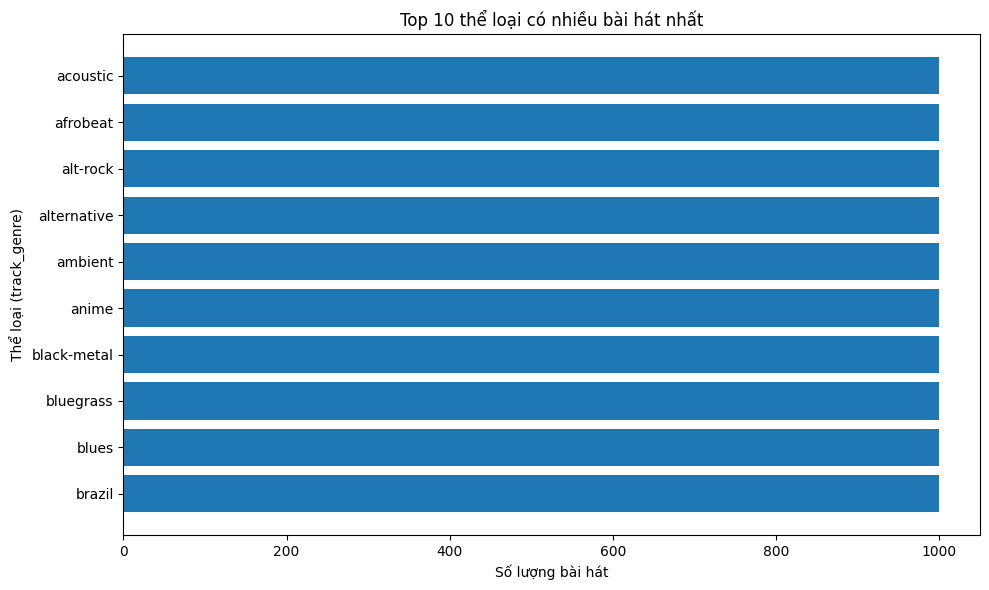

In [54]:

# %% [code]
top_genres_count = genre_stats.nlargest(10, "song_count").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_genres_count["track_genre"], top_genres_count["song_count"])
plt.title("Top 10 th·ªÉ lo·∫°i c√≥ nhi·ªÅu b√†i h√°t nh·∫•t")
plt.xlabel("S·ªë l∆∞·ª£ng b√†i h√°t")
plt.ylabel("Th·ªÉ lo·∫°i (track_genre)")
plt.tight_layout()
plt.show()



### 2.3 Bi·ªÉu ƒë·ªì: Top 10 th·ªÉ lo·∫°i c√≥ ƒë·ªô ph·ªï bi·∫øn trung b√¨nh cao nh·∫•t


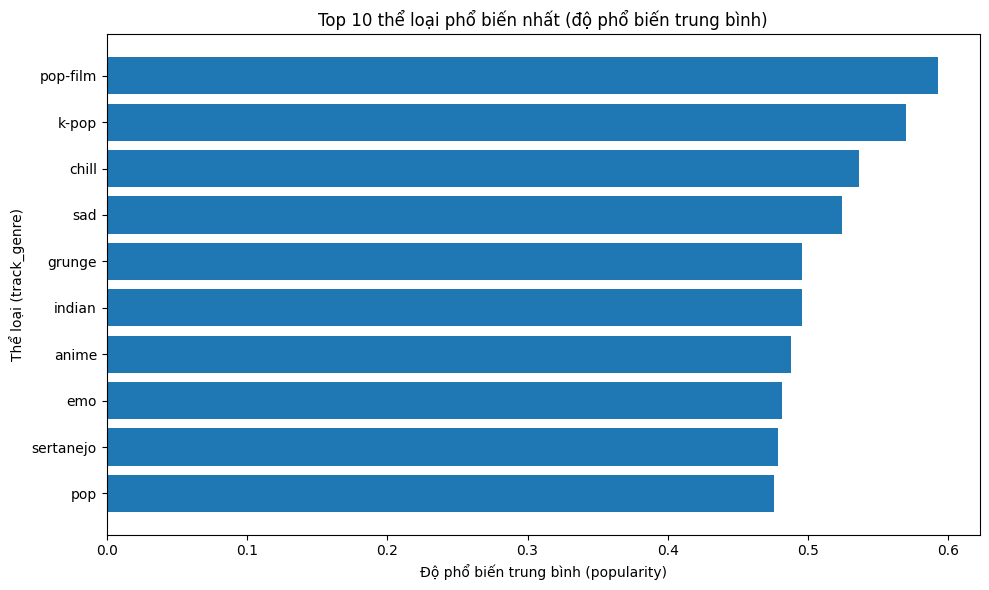

In [55]:

# %% [code]
top_genres_pop = genre_stats.nlargest(10, "avg_popularity").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_genres_pop["track_genre"], top_genres_pop["avg_popularity"])
plt.title("Top 10 th·ªÉ lo·∫°i ph·ªï bi·∫øn nh·∫•t (ƒë·ªô ph·ªï bi·∫øn trung b√¨nh)")
plt.xlabel("ƒê·ªô ph·ªï bi·∫øn trung b√¨nh (popularity)")
plt.ylabel("Th·ªÉ lo·∫°i (track_genre)")
plt.tight_layout()
plt.show()



> **Nh·∫≠n x√©t (Genre):**  
> - M·ªôt s·ªë `track_genre` c√≥ **nhi·ªÅu b√†i h√°t** nh·∫•t ph·∫£n √°nh m·ª©c ƒë·ªô ph·ªß r·ªông c·ªßa th·ªÉ lo·∫°i ƒë√≥ trong dataset.  
> - **ƒê·ªô ph·ªï bi·∫øn trung b√¨nh (avg_popularity)** cho th·∫•y m·ª©c ƒë·ªô y√™u th√≠ch ‚Äî c√≥ th·ªÉ kh√°c th·ª© h·∫°ng theo s·ªë l∆∞·ª£ng.  
> - N·∫øu c·∫ßn g·ª£i √Ω cho ng∆∞·ªùi d√πng m·ªõi, c√≥ th·ªÉ ∆∞u ti√™n c√°c th·ªÉ lo·∫°i c√≥ `avg_popularity` cao.



## 3) Ph√¢n t√≠ch **ca sƒ© (artists)**
### 3.1 Th·ªëng k√™ s·ªë l∆∞·ª£ng b√†i h√°t & ƒë·ªô ph·ªï bi·∫øn trung b√¨nh


In [57]:

# %% [code]
artist_stats = (
    df.groupby("artists")
      .agg(song_count=("track_name", "count"), avg_popularity=("popularity", "mean"))
      .reset_index()
      .sort_values("song_count", ascending=False)
)
artist_stats.head(10)


artists  song_count  avg_popularity
26983      The Beatles         279        0.610072
10418     George Jones         271        0.165055
26009    Stevie Wonder         236        0.010636
16049      Linkin Park         224        0.560714
8587   Ella Fitzgerald         222        0.007342
21810    Prateek Kuhad         217        0.463318
9306              Feid         202        0.100842
5417       Chuck Berry         190        0.078737
12000  H√•kan Hellstr√∂m         183        0.314863
20555      OneRepublic         181        0.308619


### 3.2 Bi·ªÉu ƒë·ªì: Top 10 ca sƒ© c√≥ nhi·ªÅu b√†i h√°t nh·∫•t


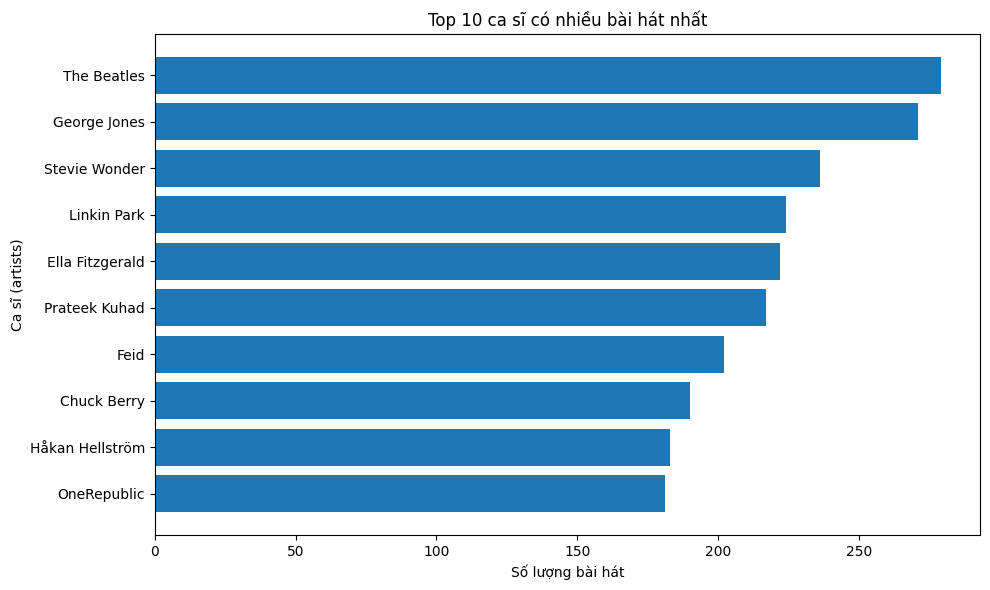

In [58]:

# %% [code]
top_artists_count = artist_stats.nlargest(10, "song_count").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_artists_count["artists"], top_artists_count["song_count"])
plt.title("Top 10 ca sƒ© c√≥ nhi·ªÅu b√†i h√°t nh·∫•t")
plt.xlabel("S·ªë l∆∞·ª£ng b√†i h√°t")
plt.ylabel("Ca sƒ© (artists)")
plt.tight_layout()
plt.show()



### 3.3 Bi·ªÉu ƒë·ªì: Top 10 ca sƒ© c√≥ ƒë·ªô ph·ªï bi·∫øn trung b√¨nh cao nh·∫•t


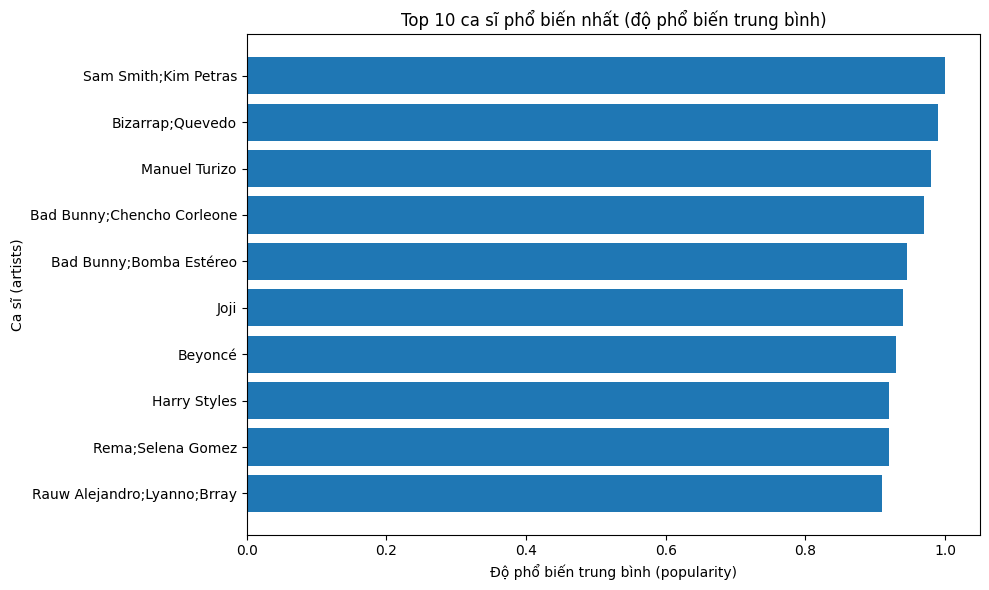

In [60]:

# %% [code]
top_artists_pop = artist_stats.nlargest(10, "avg_popularity").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_artists_pop["artists"], top_artists_pop["avg_popularity"])
plt.title("Top 10 ca sƒ© ph·ªï bi·∫øn nh·∫•t (ƒë·ªô ph·ªï bi·∫øn trung b√¨nh)")
plt.xlabel("ƒê·ªô ph·ªï bi·∫øn trung b√¨nh (popularity)")
plt.ylabel("Ca sƒ© (artists)")
plt.tight_layout()
plt.show()



> **Nh·∫≠n x√©t (Artist):**  
> - Ngh·ªá sƒ© c√≥ **nhi·ªÅu b√†i h√°t** th∆∞·ªùng l√† nh·ªØng ng∆∞·ªùi ph√°t h√†nh nhi·ªÅu ho·∫∑c xu·∫•t hi·ªán trong nhi·ªÅu album/playlist.  
> - Ngh·ªá sƒ© c√≥ **avg_popularity** cao cho th·∫•y m·ª©c ƒë·ªô y√™u th√≠ch m·∫°nh d√π s·ªë b√†i c√≥ th·ªÉ kh√¥ng nhi·ªÅu.  
> - Hai chi·ªÅu "s·ªë l∆∞·ª£ng vs y√™u th√≠ch" h·ªØu √≠ch ƒë·ªÉ x√¢y d·ª±ng g·ª£i √Ω theo ngh·ªá sƒ©.



## 4) K·∫øt lu·∫≠n
- T·ªìn t·∫°i ch√™nh l·ªách gi·ªØa **ƒë·ªô ph·ªß (song_count)** v√† **m·ª©c ƒë·ªô y√™u th√≠ch (avg_popularity)** ·ªü c·∫£ th·ªÉ lo·∫°i v√† ca sƒ©.  
- K·∫øt qu·∫£ gi√∫p:
  - G·ª£i √Ω b√†i h√°t trong **c√πng `track_genre`** c√≥ avg_popularity cao.  
  - G·ª£i √Ω **ngh·ªá sƒ© t∆∞∆°ng t·ª±** d·ª±a tr√™n th·ªëng k√™ theo `artists`.  

> B·∫°n c√≥ th·ªÉ ch√©p ph·∫ßn nh·∫≠n x√©t/k·∫øt lu·∫≠n v√†o b√°o c√°o.
